In [34]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [17]:
coords = ['x', 'y', 'z']
columns = [f"{c}{i}" for i in range(21) for c in coords]

# Add the label column
columns.append('label')

# Read the CSV with column names
df = pd.read_csv("data/finger_data.csv", names=columns)

df = shuffle(df, random_state=42)

df.head()


,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,label
157,0.330155,0.581315,-1.123969e-07,0.358144,0.576284,-0.015117,0.388409,0.546823,-0.019760,0.389718,...,0.322196,0.484288,-0.013378,0.322897,0.507819,-0.007472,0.324835,0.512354,-0.000928,0
4246,0.424212,0.714870,4.391486e-07,0.479412,0.706680,-0.022662,0.529237,0.664741,-0.033878,0.567882,...,0.409673,0.491227,-0.061541,0.407957,0.451333,-0.071465,0.411219,0.411688,-0.078007,5
1020,0.800517,0.873910,1.608671e-07,0.854175,0.835941,-0.023453,0.898925,0.769524,-0.046303,0.931204,...,0.786278,0.687386,-0.089742,0.802229,0.733632,-0.077986,0.788109,0.750441,-0.063307,1
1119,0.734914,0.946905,3.245258e-07,0.814679,0.907807,-0.055190,0.889809,0.823714,-0.094555,0.921926,...,0.673936,0.684032,-0.110537,0.702326,0.746760,-0.094772,0.703628,0.773242,-0.073140,1
731,0.501024,0.561147,-2.586024e-07,0.571887,0.536722,-0.025754,0.638807,0.461894,-0.033444,0.661204,...,0.479486,0.323070,-0.033084,0.493331,0.367441,-0.021729,0.491735,0.392940,-0.008166,0


In [36]:
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
knn.score(X_test_scaled, y_test)

0.9788418708240535

In [40]:
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

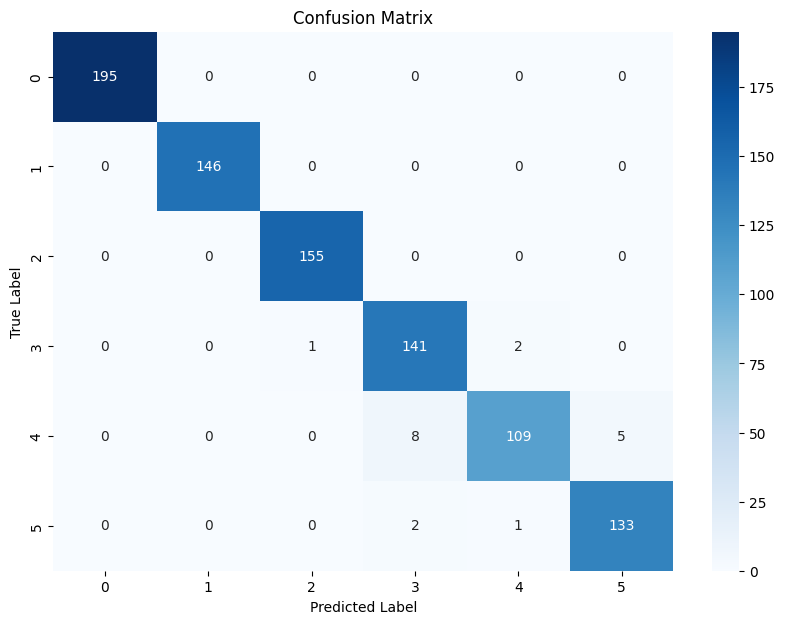

In [42]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [43]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)
    
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)